In [ ]:
# Download and import the Data Science Job Salary dataset here.
# Identify and differentiate between quantitative and qualitative data within the dataset.
# Preprocess the data by handling missing values and removing duplicates if needed.
# Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.
# Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ds_salaries.csv")



In [8]:
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
# Quantitative (Numerical)

# Unnamed: 0 (index column – not useful)
# work_year
# salary
# salary_in_usd
# remote_ratio



# Qualitative (Categorical)

# experience_level
# employment_type
# job_title
# salary_currency
# employee_residence
# company_location
# company_size

In [10]:
df = df.drop(columns=["Unnamed: 0"])


In [11]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 42


In [12]:
df = df.drop_duplicates()


In [13]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


In [14]:
salary_stats = (
    df.groupby("experience_level")["salary_in_usd"]
      .agg(["mean", "median"])
      .sort_values("mean")
)

print(salary_stats)


                           mean    median
experience_level                         
EN                 61643.318182   56500.0
MI                 87792.995192   76940.0
SE                138374.880658  135000.0
EX                199392.038462  171437.5


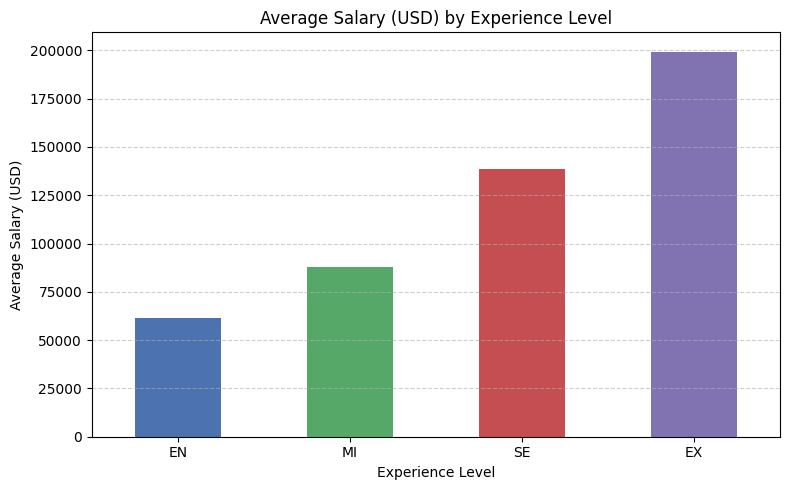

In [15]:
plt.figure(figsize=(8,5))

salary_stats["mean"].plot(
    kind="bar",
    color=["#4C72B0", "#55A868", "#C44E52", "#8172B2"]
)

plt.title("Average Salary (USD) by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
